In [81]:
import math
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt

# Defining the function that predicts the speaker :

In [82]:
def predict_speaker(mfcc_features, gmm_models):
    highest_score = -float('inf')
    predicted_speaker = None

    # Calculate scores for each GMM model
    for model_name, gmm_model in gmm_models.items():
        score = gmm_model.score(mfcc_features)

        if score > highest_score:
            highest_score = score
            predicted_speaker = model_name.split(".")[0]

    return highest_score, predicted_speaker


# Loading all the gmm models and storing them in dictionaries according to the  n_components and gender : 
## key: model_name , value: gmm model 

In [83]:
# Load all GMM models from the appropriate folder
model_folder = r'GMM\H'
gmm_models_H_16 = {}
gmm_models_H_32 = {}
gmm_models_H_128 = {}
gmm_models_H_256 = {}

for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".16.gmm"):
        gmm_models_H_16[model_filename] = gmm_model
    elif model_filename.endswith(".32.gmm"):
        gmm_models_H_32[model_filename] = gmm_model
    elif model_filename.endswith(".128.gmm"):
        gmm_models_H_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_H_256[model_filename] = gmm_model
   

In [84]:
# Load all GMM models from the appropriate folder
model_folder = r'GMM\F'
gmm_models_F_16 = {}
gmm_models_F_32 = {}
gmm_models_F_128 = {}
gmm_models_F_256 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".16.gmm"):
        gmm_models_F_16[model_filename] = gmm_model
    elif model_filename.endswith(".32.gmm"):
        gmm_models_F_32[model_filename] = gmm_model
    elif model_filename.endswith(".128.gmm"):
        gmm_models_F_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_F_256[model_filename] = gmm_model
    

In [85]:
gmm_models_F_16

{'F1.16.gmm': GaussianMixture(n_components=16),
 'F2.16.gmm': GaussianMixture(n_components=16),
 'F3.16.gmm': GaussianMixture(n_components=16),
 'F4.16.gmm': GaussianMixture(n_components=16),
 'F5.16.gmm': GaussianMixture(n_components=16),
 'F6.16.gmm': GaussianMixture(n_components=16)}

# Loading the files containing the mfcc features and storing them in dictionaries according to duration and gender:
## key: file_name , value: mfcc_features

In [86]:
# Set the path to the test folder
test_folder = r'MFCC\Test-segments'

# Initialize dictionaries to store the loaded test files
test_files_3_H = {}
test_files_3_F = {}
test_files_10_H = {}
test_files_10_F = {}
test_files_15_H = {}
test_files_15_F = {}
test_files_30_H = {}
test_files_30_F = {}

# Set the duration sub-folders
duration_folders = ["3", "10", "15", "30"]

for duration_folder in duration_folders:
    duration_folder_path = os.path.join(test_folder, duration_folder)

    # Check if the duration sub-folder exists
    if os.path.isdir(duration_folder_path):
        # Iterate over the gender sub-folders
        for gender_folder in os.listdir(duration_folder_path):
            gender_folder_path = os.path.join(duration_folder_path, gender_folder)

            # Check if the item in the duration sub-folder is a directory
            if os.path.isdir(gender_folder_path):
                # Determine the appropriate dictionary based on duration and gender
                if duration_folder == "3" and gender_folder == "H":
                    test_files_dict = test_files_3_H
                elif duration_folder == "3" and gender_folder == "F":
                    test_files_dict = test_files_3_F
                elif duration_folder == "10" and gender_folder == "H":
                    test_files_dict = test_files_10_H
                elif duration_folder == "10" and gender_folder == "F":
                    test_files_dict = test_files_10_F
                elif duration_folder == "15" and gender_folder == "H":
                    test_files_dict = test_files_15_H
                elif duration_folder == "15" and gender_folder == "F":
                    test_files_dict = test_files_15_F
                elif duration_folder == "30" and gender_folder == "H":
                    test_files_dict = test_files_30_H
                elif duration_folder == "30" and gender_folder == "F":
                    test_files_dict = test_files_30_F

                # Iterate over the test segments within the gender sub-folder
                for filename in os.listdir(gender_folder_path):
                    if filename.endswith(".mfcc"):
                        test_segment_path = os.path.join(gender_folder_path, filename)

                        # Load the MFCC features
                        mfcc_features = np.genfromtxt(test_segment_path, delimiter=',')

                        # Add the loaded features to the corresponding dictionary with the filename as the key
                        test_files_dict[filename] = mfcc_features


# Getting the predictions for the test segments:

# 1. Male tests :
## a. GMM 16 :
### 3 second segments :


In [87]:
results_3_H_16 = []

for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_3_H_16.append(mydict)

for result in results_3_H_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()



Test Speaker: H1
Num Segments: 1
MAX_Score: -51.52940474414831 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -52.465690318385434 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -45.912425888508494 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 10
MAX_Score: -49.85159587397941 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 11
MAX_Score: -48.5519808154403 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 12
MAX_Score: -47.177554909925384 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 13
MAX_Score: -48.297910817777215 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 14
MAX_Score: -47.60293112695236 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 15
MAX_Score: -45.325586451244504 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 16
MAX_Score: -49.34983951467928 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 17
MAX_Score: -44.34941728350635 --- Predicted Speaker: H2

In [88]:
false_prediction_rate = {}
false_predictions = 0
total_predictions = len(results_3_H_16)

for result in results_3_H_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_16"] = false_prediction_rate_3_H_16
false_prediction_rate_3_H_16

0.0

### 10 seconds segments :

In [89]:
results_10_H_16 = []

for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_10_H_16.append(mydict)

for result in results_10_H_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()



Test Speaker: H1
Num Segments: 1
MAX_Score: -51.900527999932436 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -47.59165502416482 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -47.711462224363785 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -48.11449074429754 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -48.18464130807604 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 5
MAX_Score: -47.01479604363635 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 6
MAX_Score: -41.57254766472773 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -49.825053047373075 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -48.61348036710843 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -49.74864168282286 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -50.49133597088151 --- Predicted Speaker: H3

Test Sp

In [90]:
false_predictions = 0
total_predictions = len(results_10_H_16)

for result in results_10_H_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_16"] = false_prediction_rate_10_H_16
false_prediction_rate_10_H_16


0.0

### 15 seconds segments :

In [91]:
results_15_H_16 = []

for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_15_H_16.append(mydict)

for result in results_15_H_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()



Test Speaker: H1
Num Segments: 1
MAX_Score: -51.900527999932436 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -47.33556353085874 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -48.276175131025354 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -47.391192824267954 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -46.93766747593192 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -49.03197646145699 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -49.75947360341258 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -49.791621074282936 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -47.909663873430084 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -49.98619010045542 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -49.45598733420444 --- Predicted Speaker: H4

Test 

In [92]:
false_predictions = 0
total_predictions = len(results_15_H_16)

for result in results_15_H_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_16"] = false_prediction_rate_15_H_16
false_prediction_rate_15_H_16

0.0

### 30 seconds segments :

In [93]:
results_30_H_16 = []

for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary
    results_30_H_16.append(mydict)

for result in results_30_H_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -51.900527999932436 --- Predicted Speaker: H1

Test Speaker: H2
Num Segments: 1
MAX_Score: -47.80586933094205 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -47.258558052584775 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -49.39572503243479 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -49.53297370740322 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -49.72108871732992 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -49.23658431459938 --- Predicted Speaker: H4

Test Speaker: H5
Num Segments: 1
MAX_Score: -51.384343073409106 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -53.21905195570821 --- Predicted Speaker: H5

Test Speaker: H6
Num Segments: 1
MAX_Score: -50.16407992829425 --- Predicted Speaker: H6

Test Speaker: H6
Num Segments: 2
MAX_Score: -50.73237630353246 --- Predicted Speaker: H6



In [94]:
false_predictions = 0
total_predictions = len(results_30_H_16)

for result in results_30_H_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_16"] = false_prediction_rate_30_H_16
false_prediction_rate_30_H_16

0.0

## b. GMM 32:
### 3 seconds segments :

In [95]:
results_3_H_32 = []
for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_H_32.append(mydict)

for result in results_3_H_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -57.056195515478834 --- Predicted Speaker: H1

Test Speaker: H1
Num Segments: 2
MAX_Score: -57.86210074172724 --- Predicted Speaker: H5

Test Speaker: H2
Num Segments: 1
MAX_Score: -46.21093257789106 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 10
MAX_Score: -50.90901212256735 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 11
MAX_Score: -49.508647148184416 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 12
MAX_Score: -47.60501736085521 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 13
MAX_Score: -48.93383769888162 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 14
MAX_Score: -48.05687558104445 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 15
MAX_Score: -46.02235415648402 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 16
MAX_Score: -49.14292809372941 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 17
MAX_Score: -44.81830093686913 --- Predicted Speaker: H2



In [96]:
false_predictions = 0
total_predictions = len(results_3_H_32)

for result in results_3_H_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_32"] = false_prediction_rate_3_H_32
false_prediction_rate_3_H_32

0.011363636363636364

### 10 seconds segments :

In [97]:
results_10_H_32 = []
for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_H_32.append(mydict)

for result in results_10_H_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -58.215538734346765 --- Predicted Speaker: H5

Test Speaker: H2
Num Segments: 1
MAX_Score: -48.29854560229488 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -48.19618160349569 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -48.7666406533036 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -48.81448717162482 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 5
MAX_Score: -47.331600759930005 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 6
MAX_Score: -42.20305432688371 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -50.92777214643603 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -49.90659209029805 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -51.084710758612296 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -51.06097859913543 --- Predicted Speaker: H3

Test Spe

In [98]:
false_predictions = 0
total_predictions = len(results_10_H_32)

for result in results_10_H_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_32"] = false_prediction_rate_10_H_32
false_prediction_rate_10_H_32

0.03571428571428571

### 15 seconds segments :

In [99]:
results_15_H_32 = []
for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_H_32.append(mydict)

for result in results_15_H_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -58.215538734346765 --- Predicted Speaker: H5

Test Speaker: H2
Num Segments: 1
MAX_Score: -47.93681691252558 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -48.90409499353719 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -48.02534638908993 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -47.05231430184832 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -50.0982460970744 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -51.18113723315652 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -50.438094037213325 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -51.972412176305156 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -51.39906207491768 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -50.64508459722206 --- Predicted Speaker: H4

Test Spe

In [100]:
false_predictions = 0
total_predictions = len(results_15_H_32)

for result in results_15_H_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_32"] = false_prediction_rate_15_H_32
false_prediction_rate_15_H_32

0.047619047619047616

### 30 seconds segments :

In [101]:
results_30_H_32 = []
for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_H_32.append(mydict)

for result in results_30_H_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -58.215538734346765 --- Predicted Speaker: H5

Test Speaker: H2
Num Segments: 1
MAX_Score: -48.42045595303139 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -47.74078040131173 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -50.63969166511546 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -50.64896352268943 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -51.02207333606986 --- Predicted Speaker: H4

Test Speaker: H4
Num Segments: 2
MAX_Score: -50.21539771212732 --- Predicted Speaker: H4

Test Speaker: H5
Num Segments: 1
MAX_Score: -52.420031569150666 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -54.57728207014316 --- Predicted Speaker: H5

Test Speaker: H6
Num Segments: 1
MAX_Score: -50.78715248120674 --- Predicted Speaker: H6

Test Speaker: H6
Num Segments: 2
MAX_Score: -51.271118078582525 --- Predicted Speaker: H6



In [102]:
false_predictions = 0
total_predictions = len(results_30_H_32)

for result in results_30_H_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_32"] = false_prediction_rate_30_H_32
false_prediction_rate_30_H_32

0.09090909090909091

## c. GMM 128:
### 3 seconds segments :

In [103]:
results_3_H_128 = []
for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_H_128.append(mydict)

for result in results_3_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -65.18358486637837 --- Predicted Speaker: H6

Test Speaker: H1
Num Segments: 2
MAX_Score: -64.80291456605453 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -49.61134683916424 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 10
MAX_Score: -56.653503817953414 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 11
MAX_Score: -55.89161801724559 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 12
MAX_Score: -51.72349695158573 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 13
MAX_Score: -53.412643139216364 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 14
MAX_Score: -53.86074005518757 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 15
MAX_Score: -49.95442934154267 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 16
MAX_Score: -54.51594934678825 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 17
MAX_Score: -49.02588176386102 --- Predicted Speaker: H2



In [104]:
false_predictions = 0
total_predictions = len(results_3_H_128)

for result in results_3_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_128"] = false_prediction_rate_3_H_128
false_prediction_rate_3_H_128

0.1590909090909091

### 10 seconds segments :

In [105]:
results_10_H_128 = []
for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_H_128.append(mydict)

for result in results_10_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -65.03269543144114 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -53.54672186232101 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -53.659721223753586 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -53.51251880052258 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -53.85147617352285 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 5
MAX_Score: -52.217736810503105 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 6
MAX_Score: -45.754498219596066 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -60.51275444062848 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -56.442513565283576 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -58.463767682311705 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -59.43872721730782 --- Predicted Speaker: H3

Test 

In [106]:
false_predictions = 0
total_predictions = len(results_10_H_128)

for result in results_10_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_128"] = false_prediction_rate_10_H_128
false_prediction_rate_10_H_128

0.21428571428571427

### 15 seconds segments :

In [107]:
results_15_H_128 = []
for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_H_128.append(mydict)

for result in results_15_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -65.03269543144114 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -53.40322688425815 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -53.74274770680662 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -52.96858550095559 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -51.7852814821679 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -58.4020892251093 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -58.54393456703987 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -58.40315820038154 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -59.01509183222022 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -58.05299499245539 --- Predicted Speaker: H6

Test Speaker: H4
Num Segments: 2
MAX_Score: -57.58444403126749 --- Predicted Speaker: H6

Test Speaker

In [108]:
false_predictions = 0
total_predictions = len(results_15_H_128)

for result in results_15_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_128"] = false_prediction_rate_15_H_128
false_prediction_rate_15_H_128

0.23809523809523808

### 30 seconds segments :

In [109]:
results_30_H_128 = []
for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_H_128.append(mydict)

for result in results_30_H_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -65.03269543144114 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -53.57298729553239 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -52.62252489168749 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -58.473011896074574 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -58.487259487333496 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -57.81871951186144 --- Predicted Speaker: H6

Test Speaker: H4
Num Segments: 2
MAX_Score: -56.76456663786936 --- Predicted Speaker: H6

Test Speaker: H5
Num Segments: 1
MAX_Score: -59.449669512914184 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -63.655978738945606 --- Predicted Speaker: H5

Test Speaker: H6
Num Segments: 1
MAX_Score: -54.8613025318802 --- Predicted Speaker: H6

Test Speaker: H6
Num Segments: 2
MAX_Score: -55.5287455298895 --- Predicted Speaker: H6



In [110]:
false_predictions = 0
total_predictions = len(results_30_H_128)

for result in results_30_H_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_128"] = false_prediction_rate_30_H_128
false_prediction_rate_30_H_128

0.2727272727272727

## d. GMM 256:
### 3 seconds segments :

In [111]:
results_3_H_256 = []
for test_segment_name, test_segment in test_files_3_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_H_256.append(mydict)

for result in results_3_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -75.50828820992129 --- Predicted Speaker: H6

Test Speaker: H1
Num Segments: 2
MAX_Score: -75.4138526420616 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -57.9399743482723 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 10
MAX_Score: -65.65602570904298 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 11
MAX_Score: -68.63065384208647 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 12
MAX_Score: -60.51447174821037 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 13
MAX_Score: -62.777157189702336 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 14
MAX_Score: -62.77431322471964 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 15
MAX_Score: -58.798600998858404 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 16
MAX_Score: -66.68114859114158 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 17
MAX_Score: -56.27915256032678 --- Predicted Speaker: H2

Te

In [112]:
false_predictions = 0
total_predictions = len(results_3_H_256)

for result in results_3_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_H_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_H_256"] = false_prediction_rate_3_H_256
false_prediction_rate_3_H_256

0.2727272727272727

### 10 seconds segments :

In [113]:
results_10_H_256 = []
for test_segment_name, test_segment in test_files_10_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_H_256.append(mydict)

for result in results_10_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -75.47085600294271 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -63.89503861805794 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -62.51163285227638 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -61.6311344013108 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -64.30447624605472 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 5
MAX_Score: -61.460387722482615 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 6
MAX_Score: -53.948039886010136 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -76.44353513962412 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -67.29551224676433 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -73.11052206862021 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -74.73458358338874 --- Predicted Speaker: H3

Test Spea

In [114]:
false_predictions = 0
total_predictions = len(results_10_H_256)

for result in results_10_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_H_256= false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_H_256"] = false_prediction_rate_10_H_256
false_prediction_rate_10_H_256

0.21428571428571427

### 15 seconds segments :

In [115]:
results_15_H_256 = []
for test_segment_name, test_segment in test_files_15_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_H_256.append(mydict)

for result in results_15_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -75.47085600294271 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -62.981390116006814 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -62.37714713175659 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 3
MAX_Score: -62.69903940071544 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 4
MAX_Score: -61.59688653836353 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -72.3405216320389 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -72.22585800463354 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 3
MAX_Score: -71.83962459842013 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 4
MAX_Score: -67.70379331435768 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -64.47228565457203 --- Predicted Speaker: H6

Test Speaker: H4
Num Segments: 2
MAX_Score: -63.948739357266675 --- Predicted Speaker: H6

Test Spea

In [117]:
false_predictions = 0
total_predictions = len(results_15_H_256)

for result in results_15_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_H_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_H_256"] = false_prediction_rate_15_H_256
false_prediction_rate_15_H_256


0.23809523809523808

### 30 seconds segments :

In [118]:
results_30_H_256 = []
for test_segment_name, test_segment in test_files_30_H.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_H_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_H_256.append(mydict)

for result in results_30_H_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: H1
Num Segments: 1
MAX_Score: -75.47085600294271 --- Predicted Speaker: H6

Test Speaker: H2
Num Segments: 1
MAX_Score: -62.679268623881704 --- Predicted Speaker: H2

Test Speaker: H2
Num Segments: 2
MAX_Score: -62.37671167682008 --- Predicted Speaker: H2

Test Speaker: H3
Num Segments: 1
MAX_Score: -72.28318981833623 --- Predicted Speaker: H3

Test Speaker: H3
Num Segments: 2
MAX_Score: -71.27121535351448 --- Predicted Speaker: H3

Test Speaker: H4
Num Segments: 1
MAX_Score: -64.21051250591935 --- Predicted Speaker: H6

Test Speaker: H4
Num Segments: 2
MAX_Score: -62.93356542792454 --- Predicted Speaker: H6

Test Speaker: H5
Num Segments: 1
MAX_Score: -69.63721586241282 --- Predicted Speaker: H5

Test Speaker: H5
Num Segments: 2
MAX_Score: -75.77736355680129 --- Predicted Speaker: H5

Test Speaker: H6
Num Segments: 1
MAX_Score: -60.898225826139466 --- Predicted Speaker: H6

Test Speaker: H6
Num Segments: 2
MAX_Score: -61.99130192793919 --- Predicted Speaker: H6



In [119]:
false_predictions = 0
total_predictions = len(results_30_H_256)

for result in results_30_H_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_H_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_H_256"] = false_prediction_rate_30_H_256
false_prediction_rate_30_H_256

0.2727272727272727

# 2. Female tests :
## a. GMM 16 :
### 3 second segments :

In [120]:
results_3_F_16 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_16.append(mydict)

for result in results_3_F_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -52.38556438369983 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -50.68573843343561 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -52.27061908734399 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 12
MAX_Score: -52.043161533948464 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 13
MAX_Score: -52.04480177715755 --- Predicted Speaker: F3

Test Speaker: F1
Num Segments: 14
MAX_Score: -50.02928755859594 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -50.570714615112486 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -50.51645987914506 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -52.6531914124215 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 18
MAX_Score: -50.99015554569427 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -50.249607433894255 --- Predicted Speaker: F1

In [121]:
false_predictions = 0
total_predictions = len(results_3_F_16)

for result in results_3_F_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_16"] = false_prediction_rate_3_F_16
false_prediction_rate_3_F_16

0.02608695652173913

### 10 seconds segments:

In [122]:
results_10_F_16 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_16.append(mydict)

for result in results_10_F_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -51.89459715056389 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -52.115414027909836 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -52.26604771668157 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -52.9130926789827 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -51.12362716436497 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -50.527014852405586 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -50.2787186454115 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -50.30041764630219 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -50.48742907490635 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -50.04266662203014 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 5
MAX_Score: -50.28649288056519 --- Predicted Speaker: F2

Test Speak

In [123]:
false_predictions = 0
total_predictions = len(results_10_F_16)

for result in results_10_F_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_16"] = false_prediction_rate_10_F_16
false_prediction_rate_10_F_16

0.0

### 15 seconds segments:

In [124]:
results_15_F_16 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_16.append(mydict)

for result in results_15_F_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -51.82821941288407 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -52.355819850552805 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -52.0452173053903 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -51.14253532278904 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -50.5863756517662 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -50.1246679259805 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -50.04582036499941 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -51.01112279176668 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -49.805968201869014 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -49.71692482113143 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 3
MAX_Score: -49.44666669033071 --- Predicted Speaker: F3

Test Speake

In [125]:
false_predictions = 0
total_predictions = len(results_15_F_16)

for result in results_15_F_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_16"] = false_prediction_rate_15_F_16
false_prediction_rate_15_F_16

0.0

### 30 seconds segments:

In [126]:
results_30_F_16 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_16)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_16.append(mydict)

for result in results_30_F_16:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -52.09201963171844 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -51.654259802721725 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -50.355521788873354 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -50.453359448103 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -49.761446511500225 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -49.80279830702365 --- Predicted Speaker: F3

Test Speaker: F4
Num Segments: 1
MAX_Score: -50.8068356293526 --- Predicted Speaker: F4

Test Speaker: F4
Num Segments: 2
MAX_Score: -51.28424255653752 --- Predicted Speaker: F4

Test Speaker: F5
Num Segments: 1
MAX_Score: -48.41017246472309 --- Predicted Speaker: F5

Test Speaker: F5
Num Segments: 2
MAX_Score: -49.45217353708378 --- Predicted Speaker: F5

Test Speaker: F6
Num Segments: 1
MAX_Score: -49.13099035837879 --- Predicted Speaker: F6

Test Speak

In [127]:
false_predictions = 0
total_predictions = len(results_30_F_16)

for result in results_30_F_16:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_16 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_16"] = false_prediction_rate_30_F_16
false_prediction_rate_30_F_16

0.0

## b. GMM 32:
### 3 second segments :

In [128]:
results_3_F_32 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_32.append(mydict)

for result in results_3_F_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -53.243223604949 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -51.118228398245385 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -52.873031108378974 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 12
MAX_Score: -52.44635765794575 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 13
MAX_Score: -52.62559128714363 --- Predicted Speaker: F3

Test Speaker: F1
Num Segments: 14
MAX_Score: -50.948435473771596 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -51.361109435243165 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -51.3724076514504 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -52.2371094603067 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 18
MAX_Score: -51.753865543826834 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -51.460608277438105 --- Predicted Speaker: F1

In [129]:
false_predictions = 0
total_predictions = len(results_3_F_32)

for result in results_3_F_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_32"] = false_prediction_rate_3_F_32
false_prediction_rate_3_F_32

0.02608695652173913

### 10 second segments :

In [130]:
results_10_F_32 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_32.append(mydict)

for result in results_10_F_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -52.668055266919914 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -53.05423713882975 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -53.31681499564852 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -52.77768764218094 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -51.609235907024086 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -51.46452701628478 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -50.88308923462499 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -51.004389690802 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -50.98638018558021 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -50.53259190174159 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 5
MAX_Score: -50.83519042983763 --- Predicted Speaker: F2

Test Speak

In [131]:
false_predictions = 0
total_predictions = len(results_10_F_32)

for result in results_10_F_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_32"] = false_prediction_rate_10_F_32
false_prediction_rate_10_F_32

0.0

### 15 second segments :

In [132]:
results_15_F_32 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_32.append(mydict)

for result in results_15_F_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -52.62496994669978 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -53.401101654232335 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -52.24312237920003 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -51.717560587194555 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -51.22320693854715 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -50.69269913545765 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -50.600704844387536 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -51.601371178496144 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -50.67021239037541 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -50.652478362566015 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 3
MAX_Score: -50.132909216220064 --- Predicted Speaker: F3

Test

In [133]:
false_predictions = 0
total_predictions = len(results_15_F_32)

for result in results_15_F_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_32"] = false_prediction_rate_15_F_32
false_prediction_rate_15_F_32

0.0

### 30 second segments :

In [134]:
results_30_F_32 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_32)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_32.append(mydict)

for result in results_30_F_32:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -53.013035800466064 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -52.01549811100716 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -50.9579530370024 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -51.02317414414988 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -50.661345376470706 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -50.60918375002357 --- Predicted Speaker: F3

Test Speaker: F4
Num Segments: 1
MAX_Score: -52.613126728508874 --- Predicted Speaker: F4

Test Speaker: F4
Num Segments: 2
MAX_Score: -53.19940606114956 --- Predicted Speaker: F4

Test Speaker: F5
Num Segments: 1
MAX_Score: -48.67448950115628 --- Predicted Speaker: F5

Test Speaker: F5
Num Segments: 2
MAX_Score: -49.79504500212656 --- Predicted Speaker: F5

Test Speaker: F6
Num Segments: 1
MAX_Score: -49.648887070039954 --- Predicted Speaker: F6

Test Sp

In [135]:
false_predictions = 0
total_predictions = len(results_30_F_32)

for result in results_30_F_32:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_32 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_32"] = false_prediction_rate_30_F_32
false_prediction_rate_30_F_32

0.0

## c. GMM 128:
### 3 second segments :

In [136]:
results_3_F_128 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_128.append(mydict)

for result in results_3_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -59.2303015734698 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -55.635464764634285 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -58.39112181236604 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 12
MAX_Score: -57.49028306383304 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 13
MAX_Score: -57.72363305713921 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 14
MAX_Score: -55.61519837304769 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -55.85321728246038 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -55.97564664362099 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -56.21596869612109 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 18
MAX_Score: -56.281449496817274 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -55.18498693503435 --- Predicted Speaker: F1


In [137]:
false_predictions = 0
total_predictions = len(results_3_F_128)

for result in results_3_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_128"] = false_prediction_rate_3_F_128
false_prediction_rate_3_F_128

0.2

### 10 second segments :

In [138]:
results_10_F_128 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_128.append(mydict)

for result in results_10_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -58.499178576139805 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -58.12897203619011 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -58.82554272501089 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -57.5656101357579 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 5
MAX_Score: -56.19541672955876 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -55.539373759014694 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -54.904345015923305 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -54.75100773199582 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -54.99078815791103 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -54.316277148598076 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 5
MAX_Score: -54.801075334521144 --- Predicted Speaker: F2

Test S

In [139]:
false_predictions = 0
total_predictions = len(results_10_F_128)

for result in results_10_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_128"] = false_prediction_rate_10_F_128
false_prediction_rate_10_F_128

0.16666666666666666

### 15 second segments :

In [140]:
results_15_F_128 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_128.append(mydict)

for result in results_15_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -58.063411898500924 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -58.90571699305961 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 3
MAX_Score: -57.01469071776926 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 4
MAX_Score: -55.94888851394961 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -55.38060085955769 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -54.38349307766241 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -54.47503416815016 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -55.805200469366056 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -55.68713597550218 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -55.9325625510514 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 3
MAX_Score: -55.98379275300191 --- Predicted Speaker: F3

Test Spea

In [141]:
false_predictions = 0
total_predictions = len(results_15_F_128)

for result in results_15_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_128"] = false_prediction_rate_15_F_128
false_prediction_rate_15_F_128

0.16666666666666666

### 30 second segments :

In [142]:
results_30_F_128 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_128)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_128.append(mydict)

for result in results_30_F_128:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -58.48456444578027 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -56.553084774618355 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -54.88204696861005 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -55.036614393933135 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -55.80984926327679 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -56.12928741187493 --- Predicted Speaker: F3

Test Speaker: F4
Num Segments: 1
MAX_Score: -63.67836793038573 --- Predicted Speaker: F1

Test Speaker: F4
Num Segments: 2
MAX_Score: -63.85505002146723 --- Predicted Speaker: F2

Test Speaker: F5
Num Segments: 1
MAX_Score: -52.410268052414416 --- Predicted Speaker: F5

Test Speaker: F5
Num Segments: 2
MAX_Score: -54.28473200121292 --- Predicted Speaker: F5

Test Speaker: F6
Num Segments: 1
MAX_Score: -53.293611862642514 --- Predicted Speaker: F6

Test S

In [143]:
false_predictions = 0
total_predictions = len(results_30_F_128)

for result in results_30_F_128:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_128 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_128"] = false_prediction_rate_30_F_128
false_prediction_rate_30_F_128

0.16666666666666666

## d. GMM 256:
### 3 second segments :

In [144]:
results_3_F_256 = []
for test_segment_name, test_segment in test_files_3_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_3_F_256.append(mydict)

for result in results_3_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -69.29361420117765 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 10
MAX_Score: -64.14965393259259 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 11
MAX_Score: -70.01722047069651 --- Predicted Speaker: F2

Test Speaker: F1
Num Segments: 12
MAX_Score: -64.02058848966767 --- Predicted Speaker: F2

Test Speaker: F1
Num Segments: 13
MAX_Score: -69.12962805214407 --- Predicted Speaker: F3

Test Speaker: F1
Num Segments: 14
MAX_Score: -63.397650848829436 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 15
MAX_Score: -63.60425407097703 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 16
MAX_Score: -64.3305897351763 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 17
MAX_Score: -72.79174806981912 --- Predicted Speaker: F3

Test Speaker: F1
Num Segments: 18
MAX_Score: -61.91281370258411 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 19
MAX_Score: -63.228269535326405 --- Predicted Speaker: F1


In [145]:
false_predictions = 0
total_predictions = len(results_3_F_256)

for result in results_3_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_3_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_3_F_256"] = false_prediction_rate_3_F_256
false_prediction_rate_3_F_256

0.25217391304347825

### 10 second segments :

In [146]:
results_10_F_256 = []
for test_segment_name, test_segment in test_files_10_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_10_F_256.append(mydict)

for result in results_10_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -68.05627334020252 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -67.70351285718553 --- Predicted Speaker: F2

Test Speaker: F1
Num Segments: 3
MAX_Score: -68.4753770537103 --- Predicted Speaker: F2

Test Speaker: F1
Num Segments: 4
MAX_Score: -71.84667422161236 --- Predicted Speaker: F3

Test Speaker: F1
Num Segments: 5
MAX_Score: -67.63717284456786 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 6
MAX_Score: -62.77838920211615 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -62.377867882613764 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -61.648912047379866 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -63.00579510787462 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -60.88793263931917 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 5
MAX_Score: -62.58311315210139 --- Predicted Speaker: F2

Test Spea

In [147]:
false_predictions = 0
total_predictions = len(results_10_F_256)

for result in results_10_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_10_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_10_F_256"] = false_prediction_rate_10_F_256
false_prediction_rate_10_F_256

0.25

### 15 second segments :

In [148]:
results_15_F_256 = []
for test_segment_name, test_segment in test_files_15_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_15_F_256.append(mydict)

for result in results_15_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -67.43236195407742 --- Predicted Speaker: F1

Test Speaker: F1
Num Segments: 2
MAX_Score: -68.5496963235011 --- Predicted Speaker: F2

Test Speaker: F1
Num Segments: 3
MAX_Score: -70.4215800892739 --- Predicted Speaker: F2

Test Speaker: F1
Num Segments: 4
MAX_Score: -66.54619386847546 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -62.613897318316255 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -62.07448604026257 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 3
MAX_Score: -61.40167572208282 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 4
MAX_Score: -64.33335457634622 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -64.66658278454882 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -65.72817172770476 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 3
MAX_Score: -64.42680278051853 --- Predicted Speaker: F3

Test Speake

In [149]:
false_predictions = 0
total_predictions = len(results_15_F_256)

for result in results_15_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_15_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_15_F_256"] = false_prediction_rate_15_F_256
false_prediction_rate_15_F_256

0.25

### 30 second segments :

In [150]:
results_30_F_256 = []
for test_segment_name, test_segment in test_files_30_F.items():
    mydict = {}
    mydict["maxScore"], mydict["IdentifiedSpeaker"] = predict_speaker(test_segment, gmm_models_F_256)
    mydict["TestSpeaker"] = test_segment_name.split(".")[0]  # Add the test speaker name to the dictionary
    mydict["NumSegments"] = test_segment_name.split(".")[2]  # Add the number of segments to the dictionary

    results_30_F_256.append(mydict)

for result in results_30_F_256:
    print("Test Speaker:", result["TestSpeaker"])
    print("Num Segments:", result["NumSegments"])
    print("MAX_Score:", result["maxScore"], "--- Predicted Speaker:", result["IdentifiedSpeaker"])
    print()

Test Speaker: F1
Num Segments: 1
MAX_Score: -69.00012824793268 --- Predicted Speaker: F2

Test Speaker: F1
Num Segments: 2
MAX_Score: -69.32034769892987 --- Predicted Speaker: F1

Test Speaker: F2
Num Segments: 1
MAX_Score: -62.34419167928941 --- Predicted Speaker: F2

Test Speaker: F2
Num Segments: 2
MAX_Score: -62.63939529999988 --- Predicted Speaker: F2

Test Speaker: F3
Num Segments: 1
MAX_Score: -65.19737725612679 --- Predicted Speaker: F3

Test Speaker: F3
Num Segments: 2
MAX_Score: -64.70386496615957 --- Predicted Speaker: F3

Test Speaker: F4
Num Segments: 1
MAX_Score: -71.93956612463347 --- Predicted Speaker: F1

Test Speaker: F4
Num Segments: 2
MAX_Score: -72.68551267897591 --- Predicted Speaker: F1

Test Speaker: F5
Num Segments: 1
MAX_Score: -58.393322503893394 --- Predicted Speaker: F5

Test Speaker: F5
Num Segments: 2
MAX_Score: -61.12964175655651 --- Predicted Speaker: F5

Test Speaker: F6
Num Segments: 1
MAX_Score: -58.469773075804504 --- Predicted Speaker: F6

Test Spe

In [151]:
false_predictions = 0
total_predictions = len(results_30_F_256)

for result in results_30_F_256:
    test_speaker = result["TestSpeaker"]
    identified_speaker = result["IdentifiedSpeaker"]
    
    if test_speaker != identified_speaker:
        false_predictions += 1

false_prediction_rate_30_F_256 = false_predictions / total_predictions
false_prediction_rate["false_prediction_rate_30_F_256"] = false_prediction_rate_30_F_256
false_prediction_rate_30_F_256


0.25

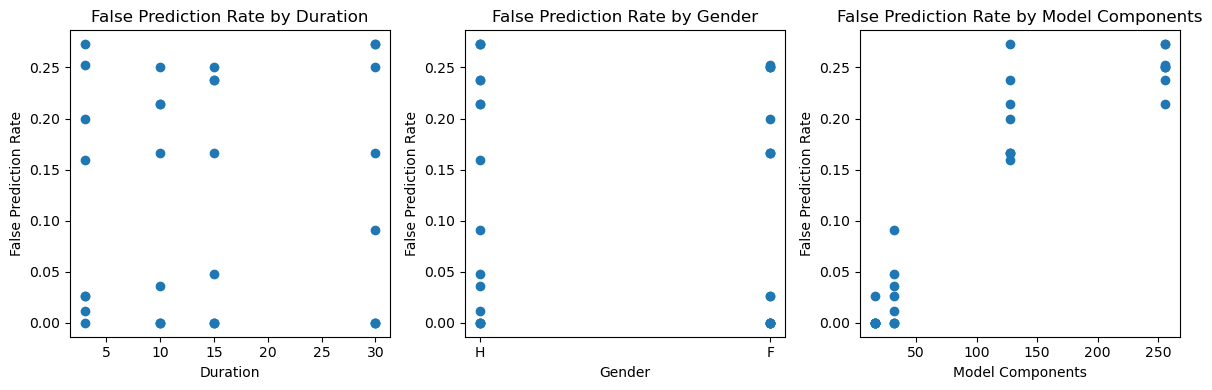

In [152]:
# Extract duration, gender, and model components from keys
durations = []
genders = []
model_components = []
rates = []

for key, rate in false_prediction_rate.items():
    parts = key.split('_')
    duration = int(parts[3])
    gender = parts[4]
    model_component = int(parts[5])
    
    durations.append(duration)
    genders.append(gender)
    model_components.append(model_component)
    rates.append(rate)

# Plot the rates
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot for duration
axs[0].scatter(durations, rates)
axs[0].set_title("False Prediction Rate by Duration")
axs[0].set_xlabel("Duration")
axs[0].set_ylabel("False Prediction Rate")

# Plot for gender
axs[1].scatter(genders, rates)
axs[1].set_title("False Prediction Rate by Gender")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("False Prediction Rate")

# Plot for model components
axs[2].scatter(model_components, rates)
axs[2].set_title("False Prediction Rate by Model Components")
axs[2].set_xlabel("Model Components")
axs[2].set_ylabel("False Prediction Rate")

plt.tight_layout()
plt.show()

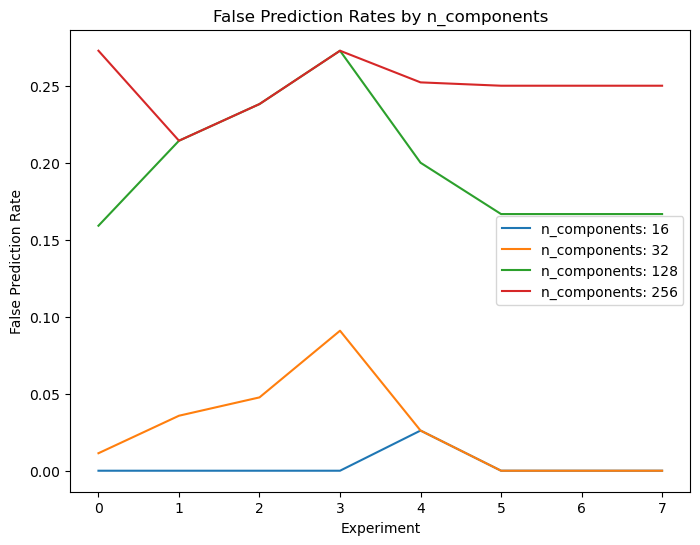

In [153]:
from collections import defaultdict

# Create a defaultdict to store the false prediction rates
grouped_rates = defaultdict(list)

# Accumulate the rates for each n_components group
for key, rate in false_prediction_rate.items():
    parts = key.split('_')
    n = int(parts[5])
    grouped_rates[n].append(rate)

# Extract n_components and rates
n_components = list(grouped_rates.keys())
rates = [grouped_rates[n] for n in n_components]

# Plot the curve
plt.figure(figsize=(8, 6))
for n, rate in zip(n_components, rates):
    plt.plot(rate, label=f'n_components: {n}')
plt.title("False Prediction Rates by n_components")
plt.xlabel("Experiment")
plt.ylabel("False Prediction Rate")
plt.legend()
plt.show()


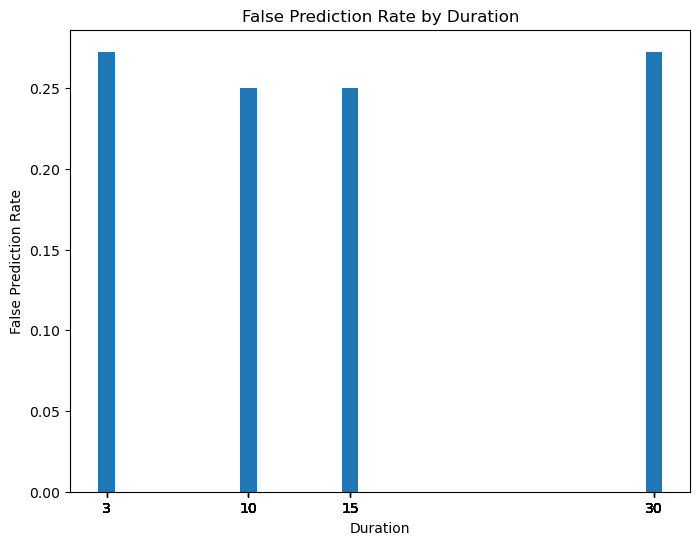

In [154]:
# Extract durations and rates
durations = []
rates = []

for key, rate in false_prediction_rate.items():
    parts = key.split('_')
    duration = int(parts[3])
    durations.append(duration)
    rates.append(rate)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(durations, rates)
plt.title("False Prediction Rate by Duration")
plt.xlabel("Duration")
plt.ylabel("False Prediction Rate")
plt.xticks(durations)
plt.show()


In [155]:
false_prediction_rate

{'false_prediction_rate_3_H_16': 0.0,
 'false_prediction_rate_10_H_16': 0.0,
 'false_prediction_rate_15_H_16': 0.0,
 'false_prediction_rate_30_H_16': 0.0,
 'false_prediction_rate_3_H_32': 0.011363636363636364,
 'false_prediction_rate_10_H_32': 0.03571428571428571,
 'false_prediction_rate_15_H_32': 0.047619047619047616,
 'false_prediction_rate_30_H_32': 0.09090909090909091,
 'false_prediction_rate_3_H_128': 0.1590909090909091,
 'false_prediction_rate_10_H_128': 0.21428571428571427,
 'false_prediction_rate_15_H_128': 0.23809523809523808,
 'false_prediction_rate_30_H_128': 0.2727272727272727,
 'false_prediction_rate_3_H_256': 0.2727272727272727,
 'false_prediction_rate_10_H_256': 0.21428571428571427,
 'false_prediction_rate_15_H_256': 0.23809523809523808,
 'false_prediction_rate_30_H_256': 0.2727272727272727,
 'false_prediction_rate_3_F_16': 0.02608695652173913,
 'false_prediction_rate_10_F_16': 0.0,
 'false_prediction_rate_15_F_16': 0.0,
 'false_prediction_rate_30_F_16': 0.0,
 'false_pre

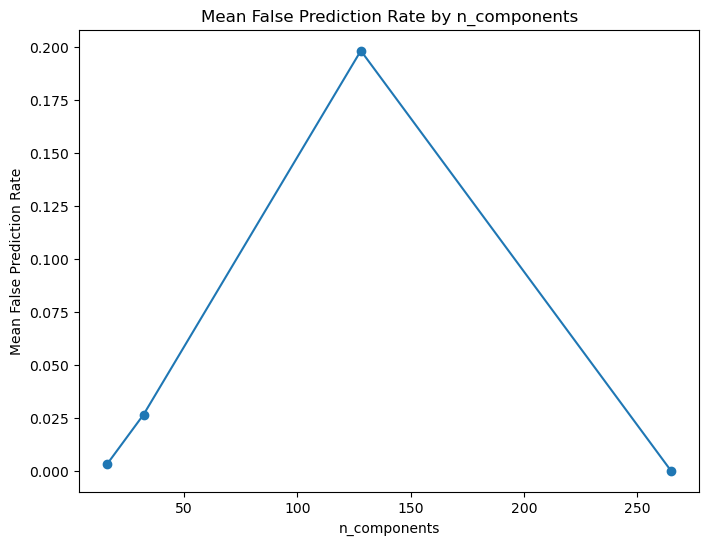

In [157]:
# Calculate mean rates
mean_rates = []
n_components = [16, 32, 128, 265]

for n in n_components:
    rates = []
    for key, rate in false_prediction_rate.items():
        parts = key.split('_')
        if int(parts[5]) == n:
            rates.append(rate)
    # Check if rates list is empty before calculating mean
    if rates:
        mean_rate = sum(rates) / len(rates)
    else:
        mean_rate = 0  # or any other default value
    mean_rates.append(mean_rate)

# Plot the mean rates
plt.figure(figsize=(8, 6))
plt.plot(n_components, mean_rates, marker='o', linestyle='-')
plt.title("Mean False Prediction Rate by n_components")
plt.xlabel("n_components")
plt.ylabel("Mean False Prediction Rate")
plt.show()
